In [29]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
csv_readin = pd.read_csv('input_data1.csv')
df = pd.DataFrame(csv_readin)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


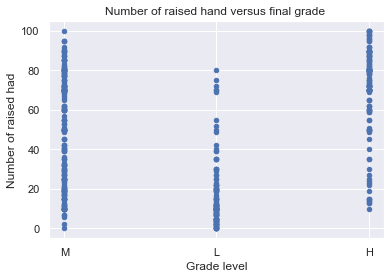

In [31]:
sns.set_theme()
fig1 = df.plot.scatter(x = 'Class', y='raisedhands')
fig1.set_title('Number of raised hand versus final grade ')
fig1.set_xlabel('Grade level')
fig1.set_ylabel('Number of raised had')
fig1.get_figure().savefig('s3figure1.png')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


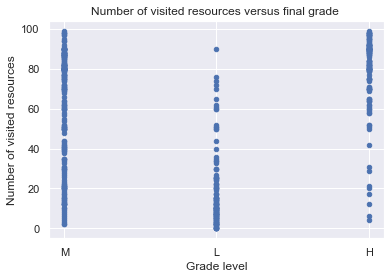

In [32]:
fig2 = df.plot.scatter(x = 'Class', y='VisITedResources')
fig2.set_title('Number of visited resources versus final grade ')
fig2.set_xlabel('Grade level')
fig2.set_ylabel('Number of visited resources')
fig2.get_figure().savefig('s3figure2.png')
plt.show()

In [33]:
import tensorflow as tf
from keras import layers as klayer
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
tf.random.set_seed(1234)

print("--Get data--")
data = pd.read_csv('data_cleaned.csv',index_col=False)
data.convert_dtypes()
data.head(10)
#Change text data to numerical data
def convert_absenceDays (text):
	if text == 'Under-7':
		return 0 
	else:
		return 1
# apply convert function to dataframe
data['absenceDays_flaged'] = data['StudentAbsenceDays'].apply(convert_absenceDays)
data.head(10)
input_data = data.loc[:,['absenceDays_flaged','Discussion','AnnouncementsView','VisITedResources','raisedhands']]
true_label = data.loc[:,['Grade_level']]
x_train,x_test,y_train,y_test = train_test_split(input_data, true_label.values.ravel(),test_size=0.2,random_state=1)
x_train = np.asarray(x_train).astype(np.int32)
x_test = np.asarray(x_test).astype(np.int32)
y_train = np.asarray(y_train).astype(np.int32)
y_test = np.asarray(y_test).astype(np.int32)

--Get data--


In [49]:
print("--Make model--")
model = tf.keras.models.Sequential()     
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(500, activation = "relu", use_bias= True))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.005), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print("--Fit model--")
model.fit(x_train, y_train, epochs=50, verbose=1)
print("--Evaluate model--")
model_loss1, model_acc1 = model.evaluate(x_train,  y_train, verbose=2)
model_loss2, model_acc2 = model.evaluate(x_test,  y_test, verbose=2)
print(f"Train / Test Accuracy: {model_acc1*100:.1f}% / {model_acc2*100:.1f}%")

--Make model--
--Fit model--
Epoch 1/50
13/13 [==============================] - 0s 988us/step - loss: 4.4997 - accuracy: 0.4045
Epoch 2/50
13/13 [==============================] - 0s 1ms/step - loss: 2.4607 - accuracy: 0.4975
Epoch 3/50
13/13 [==============================] - 0s 1ms/step - loss: 1.2770 - accuracy: 0.5201
Epoch 4/50
13/13 [==============================] - 0s 1ms/step - loss: 1.0230 - accuracy: 0.5754
Epoch 5/50
13/13 [==============================] - 0s 1ms/step - loss: 1.0627 - accuracy: 0.5528
Epoch 6/50
13/13 [==============================] - 0s 2ms/step - loss: 0.8818 - accuracy: 0.5980
Epoch 7/50
13/13 [==============================] - 0s 1ms/step - loss: 0.8352 - accuracy: 0.6206
Epoch 8/50
13/13 [==============================] - 0s 2ms/step - loss: 0.9464 - accuracy: 0.6256
Epoch 9/50
13/13 [==============================] - 0s 1ms/step - loss: 0.7151 - accuracy: 0.6608
Epoch 10/50
13/13 [==============================] - 0s 1ms/step - loss: 0.6420 - accur